In [64]:
"""
Statistics and Trends Assignment
This script performs data analysis on a Bollywood movies dataset, including relational, categorical, and statistical plots.
It also calculates and discusses the four main statistical moments for the 'Revenue(INR)' column."""

"\nStatistics and Trends Assignment\nThis script performs data analysis on a Bollywood movies dataset, including relational, categorical, and statistical plots.\nIt also calculates and discusses the four main statistical moments for the 'Revenue(INR)' column."

In [65]:
from corner import corner
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns


In [66]:
def plot_relational_plot(df):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x='Budget(INR)', y='Revenue(INR)', data=df, hue='Genre', palette='viridis', ax=ax)
    
    ax.set_title('Revenue vs Budget (Colored by Genre)')
    ax.set_xlabel('Budget(INR)')
    ax.set_ylabel('Revenue(INR)')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('relational_plot.png')  
    plt.show()  
    plt.close()
    return

In [67]:
def plot_categorical_plot(df):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='coolwarm', ax=ax)
    
    ax.set_title('Number of Movies per Genre')
    ax.set_xlabel('Count')
    ax.set_ylabel('Genre')
    
    plt.savefig('categorical_plot.png')  
    plt.show()  
    plt.close()
    return

In [68]:
def plot_statistical_plot(df):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    corr = df[['Budget(INR)', 'Revenue(INR)', 'Number_of_Screens']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    
    ax.set_title('Correlation Heatmap')
    plt.savefig('statistical_plot.png')  
    plt.show()  
    plt.close()
    return


In [69]:
def statistical_analysis(df, col: str):
   
    mean = df[col].mean()
    stddev = df[col].std()
    skew = df[col].skew()
    excess_kurtosis = df[col].kurtosis()
    return mean, stddev, skew, excess_kurtosis

In [70]:
def preprocessing(df):
    
    
    df = df.dropna()
    df['Genre'] = df['Genre'].astype('category')

    
    print("Dataset Summary:")
    print(df.describe())
    print("\nCorrelation Matrix:")
    print(df[['Budget(INR)', 'Revenue(INR)', 'Number_of_Screens']].corr())

    return df


In [71]:
def writing(moments, col):
    
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, '
          f'Standard Deviation = {moments[1]:.2f}, '
          f'Skewness = {moments[2]:.2f}, and '
          f'Excess Kurtosis = {moments[3]:.2f}.')

    # Interpret skewness and kurtosis
    skewness = moments[2]
    kurtosis = moments[3]

    if skewness > 0:
        skew_interpretation = "right-skewed"
    elif skewness < 0:
        skew_interpretation = "left-skewed"
    else:
        skew_interpretation = "not skewed"

    if kurtosis > 0:
        kurtosis_interpretation = "leptokurtic"
    elif kurtosis < 0:
        kurtosis_interpretation = "platykurtic"
    else:
        kurtosis_interpretation = "mesokurtic"

    print(f'The data was {skew_interpretation} and {kurtosis_interpretation}.')
    return


In [72]:
def explain_statistics(moments, col):
    mean, stddev, skew, excess_kurtosis = moments
    print("\nWhat Do These Numbers Mean for Movie Revenue?")
    print("----------------------------------------")
    print(f"1. Average Revenue: {mean / 1e7:.2f} crore INR")
    print("   - On average, a Bollywood movie in this dataset earns around {:.2f} crore INR.".format(mean / 1e7))
   

    print(f"\n2. Variability in Revenue: {stddev / 1e7:.2f} crore INR")
    print("   - The revenue numbers vary a lot. Some movies earn much more than the average, while others earn much less.")
    print("   - This means that  a few blockbusters earn hundreds of crores, while many smaller films earn only a few crores.")

    print(f"\n3. Skewness: {skew:.2f}")
    print("   - The revenue distribution is 'right-skewed,' which means most movies earn less than the average.")
    print("   - Only a handful of movies (the big hits) earn a lot more, pulling the average up.")
   
    print(f"\n4. Excess Kurtosis: {excess_kurtosis:.2f}")
    print("   - The revenue distribution has 'heavy tails,' meaning there are more extreme values than usual.")
    print("   - In simple terms, there are more movies with very high or very low revenues than you’d expect in a normal distribution.")
    

    print("\nWhat Does This Mean for Bollywood?")
    print("--------------------------------")
    print("1. Blockbusters Rule:")
    print("   - A few big hits (like movies with big stars or franchises) earn a ton of money, which boosts the average.")
    print("   - These blockbusters are rare but have a huge impact on the industry.")

    print("\n2. Most Movies Are Just Average:")
    print("   - The majority of movies earn less than the average. Only a few become super successful.")
    print("   - This means making a movie is risky—most don’t earn huge profits.")

    print("\n3. High Risk, High Reward:")
    print("   - The film industry is unpredictable. A movie could either flop or become a massive hit.")
    print("   - Producers and investors take big risks because there’s no guarantee of success.")

    print("\n4. What Makes a Movie Successful?")
    print("   - Factors like genre, star power, director, and marketing play a huge role.")
    print("   - For example, action movies with big stars might have a better chance of becoming blockbusters.")
    return

    

In [73]:
def main():
    
    # Load the dataset
    df = pd.read_csv('data.csv')

    # Preprocess the data
    df = preprocessing(df)

    # Choose a column for statistical analysis
    col = 'Revenue(INR)'  

    
    plot_relational_plot(df)
    plot_categorical_plot(df)
    plot_statistical_plot(df)

    
    moments = statistical_analysis(df, col)
    writing(moments, col)
    explain_statistics(moments,col)
    return


Dataset Summary:
       Number_of_Screens  Revenue(INR)   Budget(INR)
count        1698.000000  1.698000e+03  1.698000e+03
mean          553.831567  1.501674e+08  2.377287e+08
std           782.951839  2.434838e+08  6.134398e+08
min             1.000000  3.250000e+05  7.250000e+03
25%            30.000000  1.500000e+07  1.150000e+06
50%           200.000000  5.500000e+07  1.240000e+07
75%           800.000000  1.900000e+08  1.778325e+08
max          4600.000000  2.100000e+09  8.016120e+09

Correlation Matrix:
                   Budget(INR)  Revenue(INR)  Number_of_Screens
Budget(INR)           1.000000      0.843446           0.775106
Revenue(INR)          0.843446      1.000000           0.897765
Number_of_Screens     0.775106      0.897765           1.000000


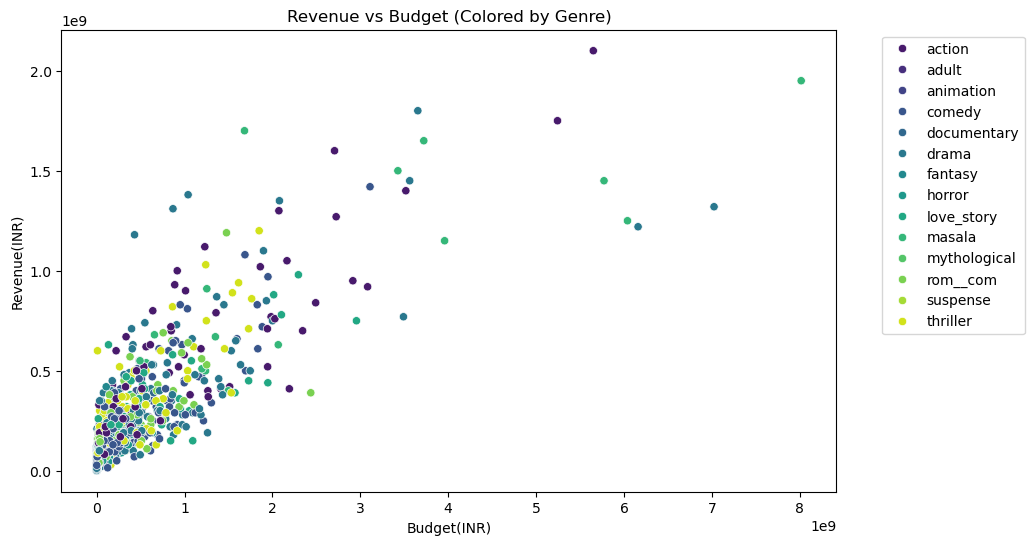

/var/folders/dt/gv58tlgd56zd1gyqgpbpycw00000gp/T/ipykernel_4718/1233953169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='coolwarm', ax=ax)


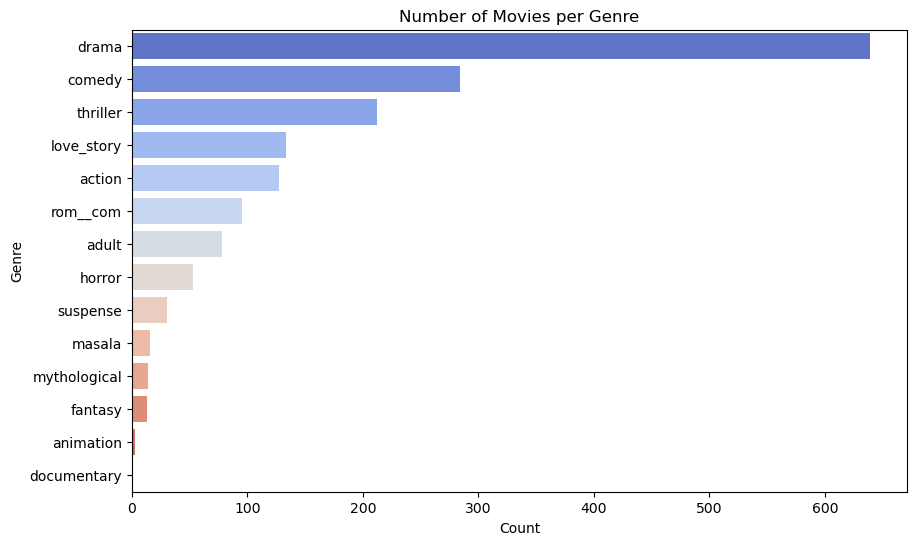

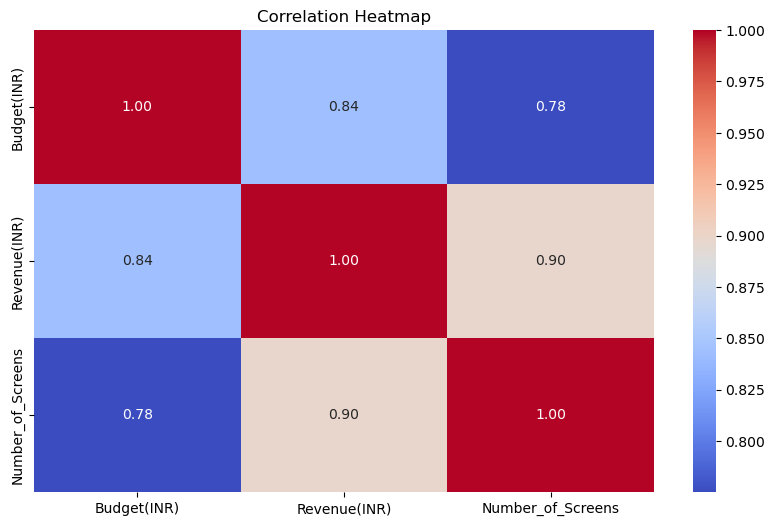

For the attribute Revenue(INR):
Mean = 150167388.10, Standard Deviation = 243483827.62, Skewness = 3.30, and Excess Kurtosis = 14.25.
The data was right-skewed and leptokurtic.

What Do These Numbers Mean for Movie Revenue?
----------------------------------------
1. Average Revenue: 15.02 crore INR
   - On average, a Bollywood movie in this dataset earns around 15.02 crore INR.

2. Variability in Revenue: 24.35 crore INR
   - The revenue numbers vary a lot. Some movies earn much more than the average, while others earn much less.
   - This means that  a few blockbusters earn hundreds of crores, while many smaller films earn only a few crores.

3. Skewness: 3.30
   - The revenue distribution is 'right-skewed,' which means most movies earn less than the average.
   - Only a handful of movies (the big hits) earn a lot more, pulling the average up.

4. Excess Kurtosis: 14.25
   - The revenue distribution has 'heavy tails,' meaning there are more extreme values than usual.
   - In simple t

In [74]:
if __name__ == '__main__':
    main()